## Problem Statement

### Build a deep learning model to predict reviews_rating from only reviews_text 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from langdetect import detect
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer,LancasterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize,WhitespaceTokenizer
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

## Data Gathering

In [2]:
data=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This table

In [3]:
df=data[["reviews.rating","reviews.text"]]
df

,reviews.rating,reviews.text
0,3,I thought it would be as big as small paper bu...
1,5,This kindle is light and easy to use especiall...
2,4,Didnt know how much i'd use a kindle so went f...
3,5,I am 100 happy with my purchase. I caught it o...
4,5,Solid entry level Kindle. Great for kids. Gift...
...,...,...
4995,5,This is a great tablet for the price. Amazon i...
4996,5,This tablet is the perfect size and so easy to...
4997,4,Purchased this for my son. Has room to upgrade...
4998,5,I had some thoughts about getting this for a 5...


## Data Initial Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  5000 non-null   int64 
 1   reviews.text    5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


### There are no missing values in our data 

### Language Detection

In [5]:
def lang_detect(data):
    lang = detect(data)
    return lang

In [6]:
df['language'] = df["reviews.text"].apply(lang_detect)
df

,reviews.rating,reviews.text,language
0,3,I thought it would be as big as small paper bu...,en
1,5,This kindle is light and easy to use especiall...,en
2,4,Didnt know how much i'd use a kindle so went f...,en
3,5,I am 100 happy with my purchase. I caught it o...,en
4,5,Solid entry level Kindle. Great for kids. Gift...,en
...,...,...,...
4995,5,This is a great tablet for the price. Amazon i...,en
4996,5,This tablet is the perfect size and so easy to...,en
4997,4,Purchased this for my son. Has room to upgrade...,en
4998,5,I had some thoughts about getting this for a 5...,en


In [7]:
df.language.unique()

array(['en', 'no', 'it', 'da', 'de'], dtype=object)

### We detect language of text column using langdetect and we observe the unique languages in text column

### Language Transformation

In [8]:
def lang_trans(data):
    translor = Translator()
    translated_text = translor.translate(data)
    return translated_text.text

In [11]:
df['translated_reviews'] = df["reviews.text"].apply(lang_trans)
df

,reviews.rating,reviews.text,language,translated_reviews
0,3,I thought it would be as big as small paper bu...,en,I thought it would be as big as small paper bu...
1,5,This kindle is light and easy to use especiall...,en,This kindle is light and easy to use especiall...
2,4,Didnt know how much i'd use a kindle so went f...,en,Didnt know how much i'd use a kindle so went f...
3,5,I am 100 happy with my purchase. I caught it o...,en,I am 100 happy with my purchase. I caught it o...
4,5,Solid entry level Kindle. Great for kids. Gift...,en,Solid entry level Kindle. Great for kids. Gift...
...,...,...,...,...
4995,5,This is a great tablet for the price. Amazon i...,en,This is a great tablet for the price. Amazon i...
4996,5,This tablet is the perfect size and so easy to...,en,This tablet is the perfect size and so easy to...
4997,4,Purchased this for my son. Has room to upgrade...,en,Purchased this for my son. Has room to upgrade...
4998,5,I had some thoughts about getting this for a 5...,en,I had some thoughts about getting this for a 5...


### Using googletrans we import Translater and we translate our text in english language

### Removing stopwords

In [12]:
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

In [13]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
clean_text

0       [thought, would, big, small, paper, turn, like...
1           [kindle, light, easy, use, especially, beach]
2       [not, know, much, would, use, kindle, went, lo...
3       [happy, purchase, caught, sale, really, good, ...
4       [solid, entry, level, kindle, great, kids, gif...
                              ...                        
4995            [great, tablet, price, amazon, good, job]
4996    [tablet, perfect, size, easy, use, read, play,...
4997    [purchased, son, room, upgrade, memory, allow,...
4998    [thoughts, getting, year, old, get, screen, pr...
4999                                [steal, model, punch]
Name: translated_reviews, Length: 5000, dtype: object

### Here using contraction mapping we expand the words like Don't as do not and then we remove stopwords like no ,nor and not from stopwords list so that negative review does not change into positive review it become as it is negative after tokenization we perform tokenization on translated review and we clean our text

## EDA

### Ngrams

In [14]:
def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

### We perform Ngrams here to observe words that which words are important and which are not important

### 1. Unigrams

In [15]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))
final_unigrams=[]
for unigram in list_unigrams:
    final_unigrams.extend(unigram)
cnt = Counter(final_unigrams).most_common(25)
cnt

[('not', 1600),
 ('great', 1598),
 ('tablet', 1306),
 ('love', 1092),
 ('use', 1084),
 ('easy', 822),
 ('bought', 785),
 ('kindle', 762),
 ('one', 760),
 ('amazon', 719),
 ('echo', 695),
 ('good', 673),
 ('like', 552),
 ('would', 527),
 ('alexa', 512),
 ('loves', 504),
 ('screen', 497),
 ('price', 477),
 ('product', 469),
 ('fire', 447),
 ('kids', 439),
 ('old', 419),
 ('music', 403),
 ('get', 388),
 ('works', 380)]

### Using unigram we can see the word and its count in data so that we can see the most frequent word in our text and we can decide which word we have to take or not

### 2.Bigrams

In [16]:
# Using bigrams we check domain specific stopwords

list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))
final_bigrams=[]
for bigram in list_bigrams:
  final_bigrams.extend(bigram)
cnt = Counter(final_bigrams).most_common(25)
cnt

[('easy use', 345),
 ('year old', 250),
 ('echo show', 174),
 ('kindle fire', 147),
 ('works great', 145),
 ('great tablet', 129),
 ('great product', 119),
 ('easy set', 117),
 ('best buy', 111),
 ('echo plus', 107),
 ('battery life', 97),
 ('would recommend', 97),
 ('works well', 93),
 ('great price', 89),
 ('amazon echo', 81),
 ('amazon fire', 77),
 ('play games', 70),
 ('amazon prime', 67),
 ('smart home', 66),
 ('kids love', 64),
 ('tablet great', 64),
 ('fire tablet', 63),
 ('read books', 62),
 ('daughter loves', 60),
 ('good tablet', 57)]

### Here we perform bigrams using bigrams we understand the reason behind the customers satisfaction or unsatisfaction

### WordCloud

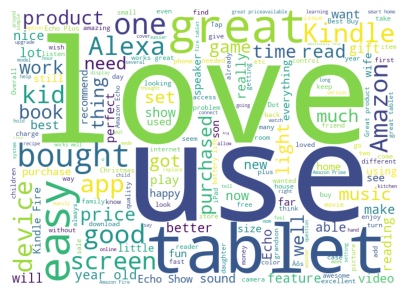

In [17]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  wordcloud = WordCloud(width=700,height=500,background_color = 'white').generate(df_)
  plt.figure(figsize=(5,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(df,'translated_reviews')

### This is overall wordcloud , Using wordcloud we can see the most frequent words in text data

## Data Pre-Processing

In [18]:
# preprocessing 
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [19]:
df["translated_reviews"] = df["translated_reviews"].apply(remove_spaces)

df["translated_reviews"] = df["translated_reviews"].apply(expand_text)

df["translated_reviews"] = df["translated_reviews"].apply(handling_accented)

df["translated_reviews"] = df["translated_reviews"].apply(clean_data)

df["translated_reviews"] = df["translated_reviews"].apply(lemmatization)

In [20]:
X_cleaned=df["translated_reviews"]

### Here we replace Newline and tab by space and using contraction mapping we expand the words like Don't as do not and we handle accented charachters by using unidecode then we remove stopwords like no ,nor and not from stopwords list so that negative review does not change into positive review it become as it is negative after tokenization we perform tokenization on translated review and we use speller to correct the spellings od text and using lemmatization we get the rootform of the word in this way we clean our text

In [21]:
X = df['translated_reviews']
y = df['reviews.rating']

### We created independent(X) and dependent(y) features

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
encoding = {1: 0,2: 1,3: 2,4: 3,5: 4}
labels = ['1', '2', '3', '4', '5']
           
y = df['reviews.rating'].copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

### We perform one hot encoding on 'reviews.rating' feature

### Train_Test_Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.1)

### We split data into training and testing dataset

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocab_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post')

Vocabulary size: 4184
Max length of sentence: 699


### We check vocabulary size and max length of sentence

## Model Building

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [36]:
embedding_vector_length=32
num_classes = 5
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(250,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint('../model/model.h5', save_best_only=True, save_weights_only=False)]

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 699, 32)           133888    
                                                                 
 bidirectional_1 (Bidirectio  (None, 699, 500)         566000    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 699, 500)          0         
                                                                 
 flatten_1 (Flatten)         (None, 349500)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               44736128  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [39]:
history = model.fit(X_train, y_train, validation_split=0.11, epochs=15, batch_size=32, verbose=1,callbacks=callbacks)

Epoch 1/15
126/126 [==============================] - 11526s 92s/step - loss: 0.4810 - accuracy: 0.8444 - val_loss: 0.9125 - val_accuracy: 0.7394
Epoch 2/15
126/126 [==============================] - 15997s 128s/step - loss: 0.3761 - accuracy: 0.8607 - val_loss: 0.9656 - val_accuracy: 0.7273
Epoch 3/15
126/126 [==============================] - 7071s 56s/step - loss: 0.3204 - accuracy: 0.8811 - val_loss: 1.0717 - val_accuracy: 0.7111
Epoch 4/15
126/126 [==============================] - 8328s 67s/step - loss: 0.2779 - accuracy: 0.8996 - val_loss: 1.2439 - val_accuracy: 0.6909
Epoch 5/15
126/126 [==============================] - 2025s 16s/step - loss: 0.2666 - accuracy: 0.9061 - val_loss: 1.2852 - val_accuracy: 0.6949
Epoch 6/15
126/126 [==============================] - 2135s 17s/step - loss: 0.2403 - accuracy: 0.9186 - val_loss: 1.3867 - val_accuracy: 0.6747


Text(0.5, 1.0, 'Training and Validation accuracy')

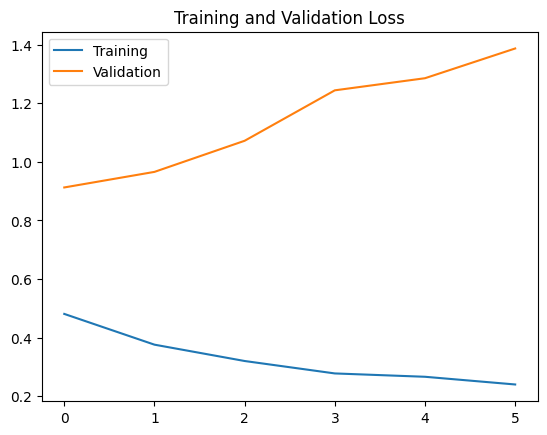

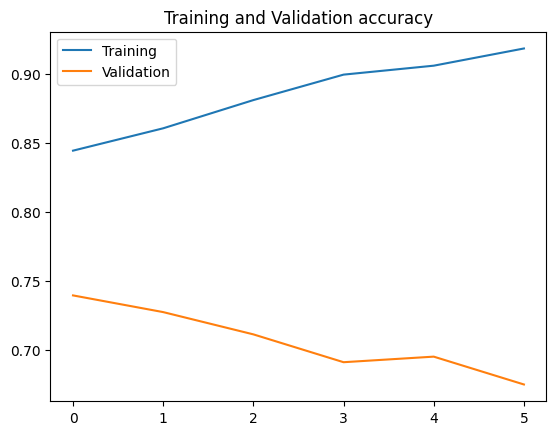

In [40]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

### We get test Accuracy as 67% 

## Testing Text 

In [100]:
def prediction(text):
    # Clean the text data
    cleaned = remove_spaces(text)
    cleaned = expand_text(cleaned)
    cleaned = handling_accented(cleaned)
    cleaned = clean_data(cleaned)
    cleaned = lemmatization(cleaned)
    
    # Tokenize the text data
    tokenized = tokenizer.texts_to_sequences([cleaned])
    
    # Pad the sequence to a fixed length
    padded = pad_sequences(tokenized, maxlen=max_length, padding='post')
    
    # Make the prediction
    pred = model.predict(padded)
    
    print(f"Predicted ratings:    {int(pred[0][0])}")


In [101]:
text="It is bad product"

prediction(text)

1/1 [==============================] - 0s 74ms/step
Predicted ratings:    0


### We tested some text and it correctly predicts the ratings as we encoded the ratings model will give the answer in that encoded format encoding = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}